<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical integration

Numerical integration approximates analytic integration, and is particularly useful because:


*   Analytic integrals may be hard to find if they exist at all!
*   Integration tends to damp experimental noise (in contrast with differentiation which tends to amplify it)

In 1D, integration is simply finding the area under the curve $s = \int_a^b f(x) \ dx$ in the range [a,b]:





Integral_as_region_under_curve.svg



For definite integrals (i.e.: with finite limits), numerical integration is called *numerical quadrature*.

> Aside: The integral sign $\int$ looks like an elongated 'S' because that 'summa' (latin for summation) is exactly what we are doing!

The methods discussed in this section consider 2 cases:
* The function $f(x)$ is available
* The data $f(x), x$ is known at a set of points.

## Newton-Cotes integration formulae

The Newton-Cotes formulae are the most common numerical integration methods. They operate on essentially the same idea:

1.   Subdivide the integration domain
2.   On each subdivision, approximate the function with a polynomial which can be integrated exactly
3.   Sum all the subdivisions

Methods differ in the choice of the polynomial degree and the number of data points needed.

**NOTE** You may wonder why we don't just fit a high degree polynomial and integrate that. As seen in the Curve Fitting notes, Runge's Phenomena, which describes the tendency for high order polynomials to exhibit high oscilations torpedos this idea (Note to mention issues with higher dimensionality).  



For example: a function being subdivided into a series of increasingly narrower rectangles:

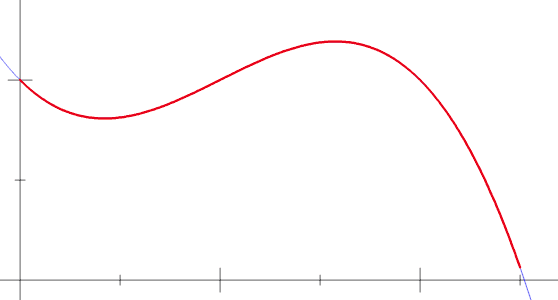


Since we are doing a summation over subdivisions, there is no *obvious* need for consideration of continuity on the edges of our discretization; each block is independant. This implies trivial parallelization:

1. Divide and distribute the integration domain amoung nodes.
2. Each node finds the integral on its node.
3. Sum all nodes.

a scheme which can also be cast as a redundant program.

#### Error

It is easy to see that as the step size, $h \rightarrow 0$, the number of boxes, $n\rightarrow \infty$, and the approximation becomes the analytic integral.

Different algorithms will *converge* to the true integral at different rates for decressing step size. As with other numerical methods, the error is characterized by orders of $h$; $O(h^k)$.

The error now has to be considered on two levels:
*  integration on a single subdomain
*  summation of subdomains

The approximation would be perfect if either the subdomain integration were perfect, or if each subdomain were infintesiamally small.

Data points are usually *equally spaced* which has benefits for error analysis *on both levels*. I.e.: One could have equally spaced data in a subdomain with a different spacing between subdomains.

For example:

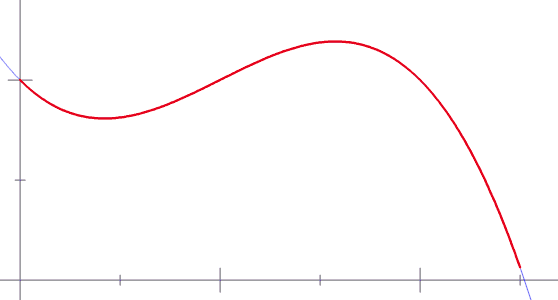

#### Use case

These formulae are valid for both the cases where the function is given and only sample points are available. However, these methods are typically only used for the case of discrete (tabulated) data.

## Reimanns integrals (order 0)

Reimann's integral is the simplest of the Newton-Cotes formulae with a polynomial of degree $0$, i.e. a constant over each subdivision. Variants exist for taking the function value at the left limit, middle, or right.

### Left and right Reimann integrals

If we take the function value at the left of the subdomain $[x_i, x_{i+1}]$ , we obtain the *left* Reimann integral,

$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),$$

or using the *right* limit,

$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_{i+1}) = \sum_{i = 1}^{n} hf(x_i),$$


These correspond to taking the function values on the left and right of the subdivision as the constant over the entire interval:

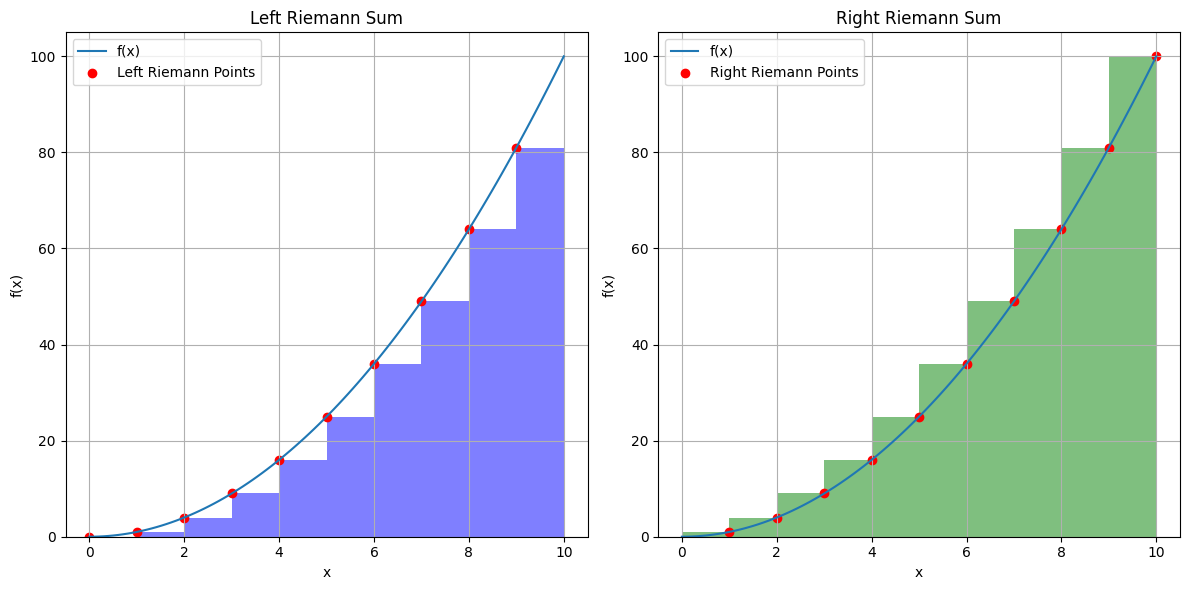

True integral, 1/3 x^3 = 333. Left integral,  285.0 Right integral,  385.0


In [ ]:
# prompt: can you make a figure that shows left, right reimann integrals? from 0 to 10, side by side figures with the points marked

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """The function to integrate."""
  return x**2

def left_reimann(f, a, b, n):
  """Calculates the left Riemann sum."""
  dx = (b - a) / n
  x_values = np.linspace(a, b - dx, n)
  return np.sum(f(x_values) * dx)

def right_reimann(f, a, b, n):
  """Calculates the right Riemann sum."""
  dx = (b - a) / n
  x_values = np.linspace(a + dx, b, n)
  return np.sum(f(x_values) * dx)

# Integration interval
a = 0
b = 10
# Number of subdivisions
n = 10

# Calculate left and right Riemann sums
left_sum = left_reimann(f, a, b, n)
right_sum = right_reimann(f, a, b, n)

# Generate x and y values for the function
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Create the left Riemann sum figure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='f(x)')
dx = (b - a) / n
x_rect = np.linspace(a, b - dx, n)
for i in range(n):
  plt.bar(x_rect[i], f(x_rect[i]), width=dx, alpha=0.5, align='edge', color='blue')
plt.title('Left Riemann Sum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_rect, f(x_rect), color='red', label='Left Riemann Points')
plt.grid(True)  # Turn on the grid
plt.legend()

# Create the right Riemann sum figure
plt.subplot(1, 2, 2)
plt.plot(x_values, y_values, label='f(x)')
x_rect = np.linspace(a + dx, b, n)
for i in range(n):
  plt.bar(x_rect[i]-dx, f(x_rect[i]), width=dx, alpha=0.5, align='edge', color='green')
plt.title('Right Riemann Sum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_rect, f(x_rect), color='red', label='Right Riemann Points')
plt.grid(True)  # Turn on the grid
plt.legend()

plt.tight_layout()
plt.show()

print("True integral, 1/3 x^3 = 333. Left integral, ", left_riemann_sum, "Right integral, ", right_riemann_sum)

#### Error

To analyse the error, consider integrating the Taylor expansion of the left integral (the right being trivially similar),

$$
\begin{align}
f(x) &= f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots \\
\int_{x_i}^{x_{i+1}} f(x) dx &= \int_{x_i}^{x_{i+1}} (f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots)\ dx \\
&= \int_{x_i}^{x_{i+1}} f(x_i) dx + \int_{x_i}^{x_{i+1}} f^{\prime}(x_i)(x-x_i)dx + \cdots.\
\end{align}$$

since the integral distributes. Integrating term by term we get,

$$ \begin{align}
\int_{x_i}^{x_{i+1}} f(x) dx &= hf(x_i) + \frac{h^2}{2}f^{\prime}(x_i) + O(h^3), \\
&= hf(x_i) + O(h^2)\end{align}
$$

For each subinterval, the left integral is $O(h^2)$.

If we sum the $O(h^2)$ error over the entire Riemann sum, we get $nO(h^2)$. The relationship between $n$ and $h$ is

$$h = \frac{b - a}{n},$$

and so our total error becomes $\frac{b - a}{h}O(h^2) = O(h)$ over the whole interval. Thus the overall accuracy is $O(h)$.


### The Midpoint Reimann integral

Rather than favour the left or right subdomain limit, let's take hte midpoint $y_i = \frac{x_{i+1} + x_i}{2}$. The Midpoint Rule says

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i).$$




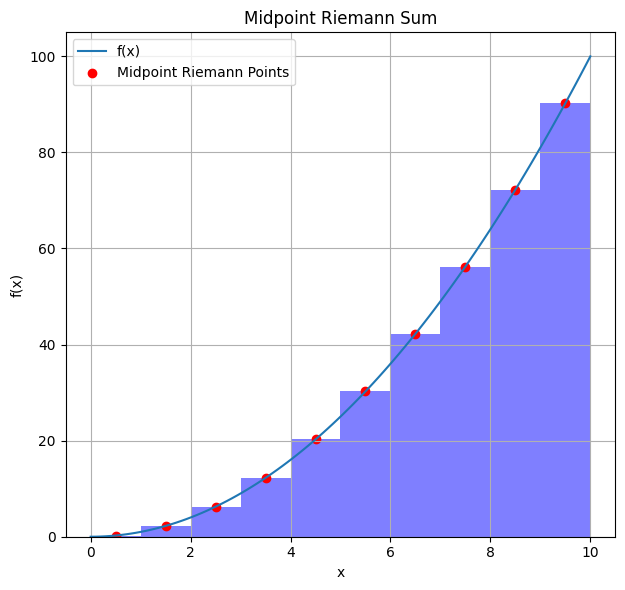

True integral, 1/3 x^3 = 333. Left integral,  285.0 Right integral,  385.0 Midpoint integral,  332.5


In [ ]:
# prompt: Repeat the code above with the midpoint rule

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """The function to integrate."""
  return x**2

def midpoint_reimann(f, a, b, n):
  """Calculates the midpoint Riemann sum."""
  dx = (b - a) / n
  x_values = np.linspace(a + dx / 2, b - dx / 2, n)
  return np.sum(f(x_values) * dx)


# Integration interval
a = 0
b = 10
# Number of subdivisions
n = 10

# Calculate left, right, and midpoint Riemann sums
midpoint_sum = midpoint_reimann(f, a, b, n)

# Generate x and y values for the function
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Create the midpoint Riemann sum figure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='f(x)')
dx = (b - a) / n
x_rect = np.linspace(a + dx / 2, b - dx / 2, n)
for i in range(n):
  plt.bar(x_rect[i], f(x_rect[i]), width=dx, alpha=0.5, align='center', color='blue')
plt.title('Midpoint Riemann Sum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x_rect, f(x_rect), color='red', label='Midpoint Riemann Points')
plt.grid(True)  # Turn on the grid
plt.legend()

plt.tight_layout()
plt.show()


print("True integral, 1/3 x^3 = 333. Left integral, ", left_sum, "Right integral, ", right_sum, "Midpoint integral, ", midpoint_sum)

Another example, approximate $\int_0^\pi \sin(x) = 2$

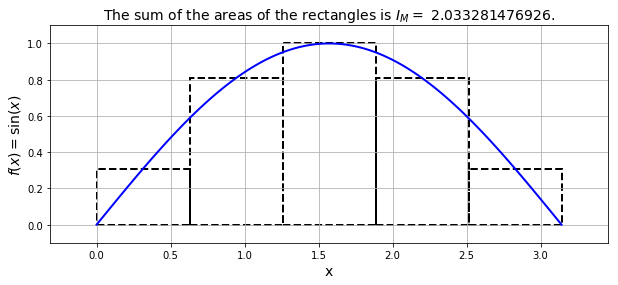

However, if you have discrete data in the range $[a,b]$ you will not be able to stricly calculate the integral since you would overlap on either side...


#### Error


The error can be deduced considering the Taylor series of $f(x)$ around $y_i$, which as before becomes,

$$
\begin{align}
f(x) &= f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots \\
\int_{x_i}^{x_{i+1}} f(x) dx &= \int_{x_i}^{x_{i+1}} \left(f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots\right) dx, \\
&= \int_{x_i}^{x_{i+1}} f(y_i)dx + \int_{x_i}^{x_{i+1}} f^{\prime}(y_i)(x - y_i)dx + \int_{x_i}^{x_{i+1}} \frac{f''(y_i)(x - y_i)^2}{2!}dx + \cdots.
\end{align}$$
but now there is a trick! Since $x_i$ and $x_{i+1}$ are symmetric about $y_i$, all odd derivatives integrate to zero; e.g. $\int_{x_i}^{x_{i+1}} f^{\prime}(y_i)(x - y_i)dx = 0$

Therefore the midpoint rule becomes:
$$\int_{x_i}^{x_{i+1}} f(x) dx= hf(y_i) + O(h^3)$$
which has $O(h^3)$ accuracy for one subinterval or $O(h^2)$ over the whole interval.

## The Trapezoid rule (order 1)

The next polynomial degree is $1$; a line.

Given the points $x_i$, $x_{i+1}$, $f_i$, and $f_{i+1}$,


$$
f(x) = f_i + \frac{f_{i+1} - f_i}{x_{i+1} - x_i} (x - x_i)
$$

and integrating,

$$
\begin{align}
\int_{x_i}^{x_{i+1}} f(x) \, dx &= \int_{x_i}^{x_{i+1}} \left( f_i + \frac{f_{i+1} - f_i}{x_{i+1} - x_i} (x - x_i) \right) dx \\
 &= \frac{f_i + f_{i+1}}{2} (x_{i+1} - x_i) \\
 &= h \frac{f_i + f_{i+1}}{2}
\end{align}
$$

Graphically:


Trapezoidal_rule_illustration.svg

#### Error

The accuracy is calculated from the Taylor series expansion of $f(x)$ around the midpoint $y_i = \frac{x_{i+1} + x_i}{2}$, which is the midpoint between $x_i$ and $x_{i+1}$.

Calculating the error is a little more complicated since we'll need the function value at the midpoint. Begin with the Taylor series at $x_i$ and $x_{i+1}$, noting that $x_i - y_i = -\frac{h}{2}$ and $x_{i+1} - y_i = \frac{h}{2}$:

$$
\begin{align}
f(x_i) &= f(y_i) - \frac{hf^{\prime}(y_i)}{2} + \frac{h^2f''(y_i)}{8} - \cdots \\
f(x_{i+1}) &= f(y_i) + \frac{hf^{\prime}(y_i)}{2} + \frac{h^2f''(y_i)}{8} + \cdots.
\end{align}
$$

Taking the average
$$\frac{f(x_{i+1})+f(x_i)}{2} = f(y_i) + O(h^2).$$
cancels odd derivatives, and we can now find,
$$f(y_i) = \frac{f(x_{i+1})+f(x_i)}{2} + O(h^2).$$


Now we take the Taylor series expanded about $y_i$ and integrate / distribute as before:

$$
\begin{align}
f(x) &= f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots \\
\int_{x_i}^{x_{i+1}} f(x) dx &= \int_{x_i}^{x_{i+1}} \left(f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots\right) dx \\
&= \int_{x_i}^{x_{i+1}} f(y_i) dx + \int_{x_i}^{x_{i+1}} f^{\prime}(y_i)(x - y_i)dx + \int_{x_i}^{x_{i+1}} \frac{f''(y_i)(x - y_i)^2}{2!} dx + \cdots
\end{align}
$$
Once again, since $x_i$ and $x_{i+1}$ are symmetric around $y_i$, odd integrals evaluate to zero. Now we can insert our result from above,

$$ \begin{align}
\int_{x_i}^{x_{i+1}} f(x) dx &= hf(y_i) + O(h^3) \\
& = h \left(\frac{f(x_{i+1})+f(x_i)}{2} + O(h^2)\right) + O(h^3) \\
&= h \left(\frac{f(x_{i+1})+f(x_i)}{2}\right) + hO(h^2) + O(h^3) \\
&= h \left(\frac{f(x_{i+1})+f(x_i)}{2}\right) + O(h^3)
\end{align}
$$

Therefore the trapezoid rule is is $O(h^3)$ over subintervals and totals $O(h^2)$ over the whole interval.

For the same function as the midpoint method (which approximated 2.033), the trapezoid method yields,

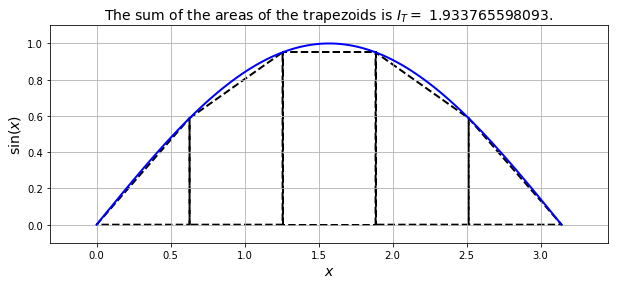

#### Example

Integrate $sin(x)$ from 0 to $\pi$ with the midpoint and trapezoid rules.

In [2]:
# prompt: integrate sin(x) from 0 to pi using the trapezoid and midpoint methods number of steps from 2 to 10

import numpy as np

def f(x):
  """The function to integrate."""
  return np.sin(x)

def trapezoid_method(f, a, b, n):
  """Approximates the integral of f from a to b using the trapezoid method."""
  h = (b - a) / n
  #####
  # What is the sampling space?

  #
  #####
  x = np.linspace(a, b, n + 1)
  #####

  integral = np.trapz(f(x), x, h)
  return integral

def midpoint_method(f, a, b, n):
  """Approximates the integral of f from a to b using the midpoint method."""
  h = (b - a) / n
  #####
  # What is the sampling space?

  #
  #####
  x = np.linspace(a + h / 2, b - h / 2, n)
  #####
  integral = h * np.sum(f(x))
  return integral

a = 0
b = np.pi
for n in [2,4,8,16,32]:
  trapezoid_result = trapezoid_method(f, a, b, n)
  midpoint_result = midpoint_method(f, a, b, n)
  print(f"n = {n}: Trapezoid error = {abs(trapezoid_result-2):.6f}, Midpoint error= {midpoint_result-2:.6f}")

n = 2: Trapezoid error = 0.429204, Midpoint error= 0.221441
n = 4: Trapezoid error = 0.103881, Midpoint error= 0.052344
n = 8: Trapezoid error = 0.025768, Midpoint error= 0.012909
n = 16: Trapezoid error = 0.006430, Midpoint error= 0.003216
n = 32: Trapezoid error = 0.001607, Midpoint error= 0.000803


Notice we get quadratic convergence for both but that the midpoint method is actually more accurate!

## Simpson's 1/3 rule (order 2)

Continuing our polynomial degrees, we arrive at a quadratic (parabola). Now we need 3 data points per fit, which we can envision as 2 subdivisions back to back.

NOTE: Considering a pair of subintervals is just a conceptualization. In truth, we need to have an *even* number of data points to use this method. Each pair is separate and we are *not* imposing any kind of continuity or overlap between subsequent pairs.


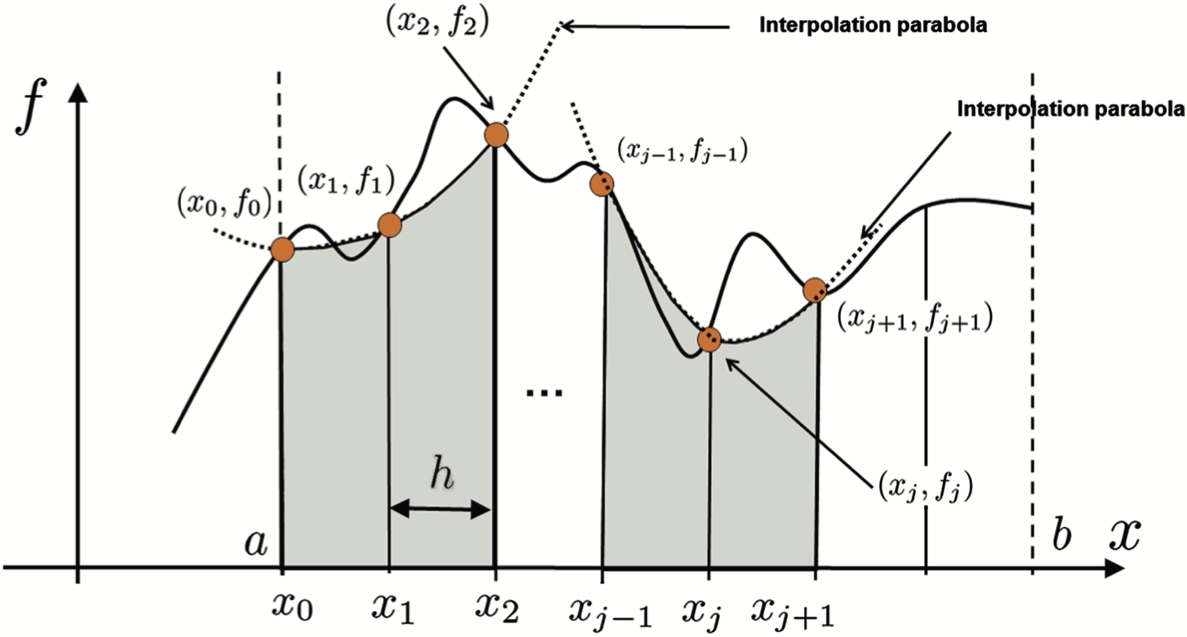

We can fit a quadratic with Lagrange polynomials with $x_i-x_{i-1} = x_{i+1}-x_{i} = h$:

$$f(x) \approx \frac{f(x_{i-1})}{2h^2} (x - x_i)(x - x_{i+1}) - \frac{f(x_i)}{h^2} (x - x_{i-1})(x - x_{i+1}) + \frac{f(x_{i+1})}{2h^2} (x - x_{i-1})(x - x_{i}).$$
and
$$\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}).$$

The $\frac{1}{3}$ gives the method its name.

#### Error analysis

For the error, take the Taylor series approximation of $f(x)$ around $x_i$,

$$f(x) = f(x_i) + f^{\prime}(x_i)(x - x_i) + \frac{f''(x_i)(x-x_i)^2}{2!} + \frac{f'''(x_i)(x-x_i)^3}{3!} + \frac{f''''(x_i)(x-x_i)^4}{4!} + \cdots$$

and evaluate at $x_{i-1}$ and $x_{i+1}$, substituting for $h$ where appropriate,

$$ \begin{align}
f(x_{i-1}) &= f(x_i) - hf^{\prime}(x_i) + \frac{h^2f''(x_i)}{2!} - \frac{h^3f'''(x_i)}{3!} + \frac{h^4f''''(x_i)}{4!} - \cdots \\
f(x_{i+1}) &= f(x_i) + hf^{\prime}(x_i) + \frac{h''(x_i)}{2!} + \frac{h^3f'''(x_i)}{3!} + \frac{h^4f''''(x_i)}{4!} + \cdots
\end{align}
$$

Now consider $\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6}$ with the expansions above,
$$\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} = f(x_i) + \frac{h^2}{6}f''(x_i) + \frac{h^4}{72}f''''(x_i) + \cdots$$
note that the odd terms cancel. Rearrange to find,
$$f(x_i) =\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} - \frac{h^2}{6}f''(x_i) + O(h^4).$$

The integral of $f(x)$ over two subintervals is,

\begin{eqnarray*}\int_{x_{i-1}}^{x_{i+1}} f(x) dx &=& \int_{x_{i-1}}^{x_{i+1}} \left(f(x_i) + f^{\prime}(x_i)(x - x_i) + \frac{f''(x_i)(x-x_i)^2}{2!}\right.\\
&&\qquad\qquad\left. + \frac{f'''(x_i)(x-x_i)^3}{3!}+ \frac{f''''(x_i)(x-x_i)^4}{4!} + \cdots\right)
dx.\end{eqnarray*}

Distributing the integral and dropping odd derivatives which are zero from symmetry,

$$
\begin{align}
\int_{x_{i-1}}^{x_{i+1}} f(x) dx &= \int_{x_{i-1}}^{x_{i+1}} f(x_i) dx + \int_{x_{i-1}}^{x_{i+1}}\frac{f''(x_i)(x-x_i)^2}{2!}dx + \int_{x_{i-1}}^{x_{i+1}}\frac{f''''(x_i)(x-x_i)^4}{4!}dx + \cdots \\
&= 2h f(x_i) + \frac{h^3}{3}f''(x_i) + O(h^5) \\
&= 2h \left(\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} - \frac{h^2}{6}f''(x_i) + O(h^4)\right) + \frac{h^3}{3}f''(x_i) + O(h^5) \\
&= \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})) + O(h^5)
\end{align}
$$
having used the previously derived result.

This equation implies that Simpson's Rule is $O(h^5)$ over a subinterval and $O(h^4)$ over the whole interval. Because the $h^3$ terms cancel out exactly, Simpson's Rule gains another *two* orders of accuracy!

#### Example
Integrate the sin(x) in $[0,\pi]$ with Simpson's 1/3 Rule and compare to midpoint and trapezoid

In [3]:
import scipy as sp

def f(x):
  """The function to integrate."""
  return np.sin(x)

def trapezoid_method(f, a, b, n):
  """Approximates the integral of f from a to b using the trapezoid method."""
  h = (b - a) / n
  x = np.linspace(a, b, n + 1)
  integral = np.trapz(f(x), x, h)
  return integral

def midpoint_method(f, a, b, n):
  """Approximates the integral of f from a to b using the midpoint method."""
  h = (b - a) / n
  x = np.linspace(a + h / 2, b - h / 2, n)
  integral = h * np.sum(f(x))
  return integral

def simps_method(f, a, b, n):
  """Approximates the integral of f from a to b using the simpsons method."""
  h = (b - a) / n
  x = np.linspace(a, b, n + 1)
  integral = sp.integrate.simpson(f(x), x = x, dx = h)
  return integral

a = 0
b = np.pi
for n in [2,4,8,16,32]:
  trapezoid_result = trapezoid_method(f, a, b, n)
  midpoint_result = midpoint_method(f, a, b, n)
  simps_result = simps_method(f, a, b, n)
  print(f"n = {n}: Trapezoid error = {abs(trapezoid_result-2):.6f}, Midpoint error= {midpoint_result-2:.6f}, Simpson's error= {simps_result-2:.6f}")

n = 2: Trapezoid error = 0.429204, Midpoint error= 0.221441, Simpson's error= 0.094395
n = 4: Trapezoid error = 0.103881, Midpoint error= 0.052344, Simpson's error= 0.004560
n = 8: Trapezoid error = 0.025768, Midpoint error= 0.012909, Simpson's error= 0.000269
n = 16: Trapezoid error = 0.006430, Midpoint error= 0.003216, Simpson's error= 0.000017
n = 32: Trapezoid error = 0.001607, Midpoint error= 0.000803, Simpson's error= 0.000001


Yowza!

## Simpson's 3/8 rule (order 3)

The final polynomial we will discuss is a cubic fit to 4 data points (3 intervals). This results in

$$ \int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{3}{8}h(f(x_{i}) + 3f(x_{i+1}) + 3f(x_{i+2} + f(x_{i+3})) + O(h^5)$$

Note the $3/8$ which lends its name. This function takes 3 intervals, and therefore a combination of the $1/3$rd and $3/8$th rules cover all possabilities without loss of error order.

Note that the order of error is the same as the $1/3$ rule. In fact, this is generally true for higher order Newton-Cotes methods generally, and therefore usually the $1/3$ and $3/8$ rule are employed.

## Uneven data

Having the same step size within a subinterval has clear benefits for convergence due to the cancellation of higher order terms. However, the error of the total integral is determined by the largest of the subdomains. Therefore, it is optimimal to have equal spacing in and between the subdomains.

For uneven data, we could define subdivisions based on where the step size is equal, thereby making best use of our data. In the case where the step size is completely random, we can resort to the trapezoid rule.

## Multiple dimensions

Multiple integrals can be decomposed into a series of 1D integrals due to the properties of integration:

$$\int \int_R f(x, y) dA = \int \bigg[\int f(x, y) dy \bigg] dx $$

This defines a recursive algorithm for calculating a series of 1D integrals.

## Summary

| Rule | Subdomain Formula | Subdomain error | Total Integral Formula | Total error|
|---|---|---| --- |---|
| Midpoint | $I_i = hf(x_i)$ | $O(h^3)$ |$I = h\sum_{i=1}^n f(x_i)$ | $O(h^2)$ |
| Trapezoid | $I_i = \frac{h}{2}[f(x_{i-1}) + f(x_i)]$ | $O(h^3)$ | $I = \frac{h}{2}[f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n)]$ | $O(h^2)$ |
| Simpson's 1/3 | $I_i = \frac{h}{3}[f(x_{i-1}) + 4f(x_i) + f(x_{i+1})]$ | $O(h^5)$ | $I = \frac{h}{3}[f(x_0) + 4\sum_{i=1,3,5}^{n-1} f(x_i) + 2\sum_{i=2,4,6}^{n-2} f(x_i) + f(x_n)]$ | $O(h^4)$ |
| Simpson's 3/8 | $I_i = \frac{3h}{8}[f(x_{i-1}) + 3f(x_i) + 3f(x_{i+1}) + f(x_{i+2})]$ | $O(h^5)$ | $I = \frac{3h}{8}[f(x_0) + 3\sum_{i=1,4,7}^{n-2} f(x_i) + 3\sum_{i=2,5,8}^{n-1} f(x_i) + 2\sum_{i=3,6,9}^{n-3} f(x_i) + f(x_n)]$ | $O(h^4)$ |